In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#importing libs

In [2]:
#loading dataset
dataset = pd.read_csv('diabetes.csv')


In [3]:
print (dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
#for each row the 1st eight coloumns is input -  8 features

X = dataset.iloc[:,0:8]
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

In [5]:
#output is in 9th column

Y = dataset.iloc[:,8]
print(Y)

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [6]:
#view the entire correlation for a feature and ouput
Z = dataset.iloc[:,:]
print(Z)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

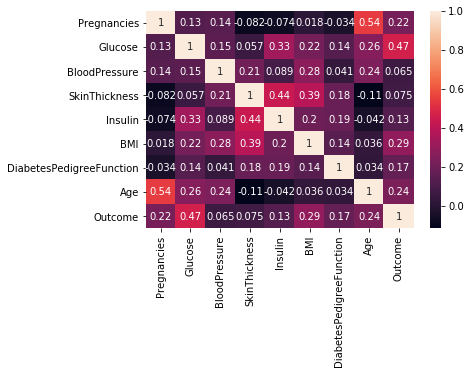

In [7]:
sns.heatmap(Z.corr(),annot= True)

In [8]:
#this plot says glucose is an important feature as it's 50% sure that you have diabetes if you have high glucose

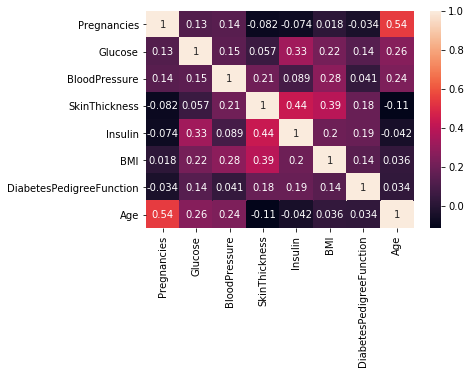

In [9]:
sns.heatmap(X.corr(),annot=True)

In [10]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
#loading test train data
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.25)

In [49]:
#feature selection
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [13]:
#implementation - we use rbf here 
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
Y_train.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
cm = confusion_matrix(Y_test, y_pred)
print (cm)

[[117  13]
 [ 30  32]]


In [17]:
print(accuracy_score(Y_test,y_pred))

0.7760416666666666


In [18]:
#okay we are not going to settle with 77% accuracy 
#now we save the model and reduce dimensions
import pickle as pc


In [19]:
filename = 'model1.sav'
pc.dump(classifier,open(filename,'wb'))

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
pcom = pca.fit_transform(X)



In [22]:
print(pcom)

[[-75.71465491 -35.95078264]
 [-82.3582676   28.90821322]
 [-74.63064344 -67.90649647]
 ...
 [ 32.11319827   3.3766648 ]
 [-80.21449431 -14.18601977]
 [-81.30814972  21.62149606]]


In [23]:
principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2'])


In [24]:
principalDataFrame.head()


,pcom1,pcom2
0,-75.714655,-35.950783
1,-82.358268,28.908213
2,-74.630643,-67.906496
3,11.077423,34.898486
4,89.743788,-2.746937


In [25]:
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()

,pcom1,pcom2,Outcome
0,-75.714655,-35.950783,1
1,-82.358268,28.908213,0
2,-74.630643,-67.906496,1
3,11.077423,34.898486,0
4,89.743788,-2.746937,1


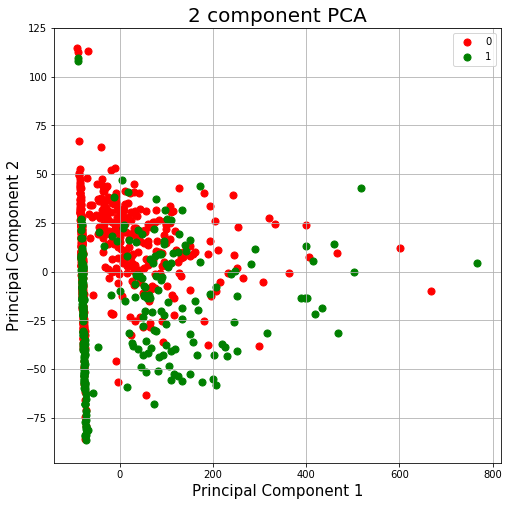

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pcom1']
               , finalDf.loc[indicesToKeep, 'pcom2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.25)

In [28]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [29]:
cm = confusion_matrix(Y_test, y_pred)
print (cm)


[[118  12]
 [ 37  25]]


In [30]:
print(accuracy_score(Y_test,y_pred))


0.7447916666666666


In [31]:
filename = 'model2.sav'
pc.dump(classifier,open(filename,'wb'))

In [32]:
pca = PCA(n_components=3)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()

,pcom1,pcom2,pcom3,Outcome
0,-75.714655,-35.950783,-7.260789,1
1,-82.358268,28.908213,-5.496671,0
2,-74.630643,-67.906496,19.461808,1
3,11.077423,34.898486,-0.053018,0
4,89.743788,-2.746937,25.212859,1


In [33]:
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.25)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [34]:
cm = confusion_matrix(Y_test, y_pred)
print (cm)


[[118  12]
 [ 34  28]]


In [35]:
print(accuracy_score(Y_test,y_pred))
filename = 'model3.sav'
pc.dump(classifier,open(filename,'wb'))


0.7604166666666666


In [36]:
pca = PCA(n_components=4)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3','pcom4'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.25)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)


[[115  15]
 [ 30  32]]


In [37]:
print(accuracy_score(Y_test,y_pred))
filename = 'model3.sav'
pc.dump(classifier,open(filename,'wb'))


0.765625


In [38]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)
classifier = SVC(random_state=0, kernel='rbf' , gamma = 'auto')
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))



[[107   0]
 [ 47   0]]
0.6948051948051948


In [39]:
filename = 'model45.sav'
pc.dump(classifier,open(filename,'wb'))


In [40]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))



[[96 11]
 [21 26]]
0.7922077922077922


C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [41]:
filename = 'model6.sav'
pc.dump(classifier,open(filename,'wb'))


In [42]:
pca = PCA(n_components=4)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3','pcom4'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)

[[94 13]
 [22 25]]


In [43]:
print(accuracy_score(Y_test,y_pred))


0.7727272727272727


In [44]:
filename = 'model7.sav'
pc.dump(classifier,open(filename,'wb'))

In [45]:
pca = PCA(n_components=5)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3','pcom4','pcom5'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='rbf' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))

[[93 14]
 [23 24]]
0.7597402597402597


In [46]:
filename = 'model8.sav'
pc.dump(classifier,open(filename,'wb'))

In [47]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='poly' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))



[[101   6]
 [ 32  15]]
0.7532467532467533


C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [48]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='linear' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))

[[98  9]
 [18 29]]
0.8246753246753247


C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [50]:
 filename = 'model9.sav'
pc.dump(classifier,open(filename,'wb'))

In [51]:
pca = PCA(n_components=5)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3','pcom4','pcom5'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='linear' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))

[[92 15]
 [21 26]]
0.7662337662337663


In [52]:
filename = 'model10.sav'
pc.dump(classifier,open(filename,'wb'))

In [53]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='sigmoid' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))

[[86 21]
 [15 32]]
0.7662337662337663


C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sivak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [73]:
filename = 'model12.sav'
pc.dump(classifier,open(filename,'wb'))

In [55]:
pca = PCA(n_components=4)
pcom = pca.fit_transform(X)

principalDataFrame = pd.DataFrame(data=pcom,columns = ['pcom1','pcom2','pcom3','pcom4'])
finalDf = pd.concat([principalDataFrame,Y],axis = 1)
finalDf.head()
X_train , X_test , Y_train ,Y_test = train_test_split(principalDataFrame,Y,random_state=0,test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = SVC(random_state=0, kernel='linear' )
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print (cm)
print(accuracy_score(Y_test,y_pred))

[[95 12]
 [23 24]]
0.7727272727272727


In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [61]:
lda = LDA(n_components=4)
ldata = lda.fit_transform(X,Y)

In [63]:
print(ldata)

[[ 1.38024702e+00]
 [-1.56452399e+00]
 [ 1.76618515e+00]
 [-1.69058752e+00]
 [ 2.20726804e+00]
 [-6.30945011e-01]
 [-1.32918043e+00]
 [ 1.12663761e+00]
 [ 1.44250389e+00]
 [-1.57821647e+00]
 [-3.60325075e-01]
 [ 2.26355831e+00]
 [ 1.64069266e+00]
 [ 1.18282272e+00]
 [ 1.13107071e+00]
 [ 3.91039109e-01]
 [ 1.57575445e-01]
 [-3.97093569e-01]
 [ 1.61251574e-01]
 [-2.61372162e-01]
 [ 2.66682978e-01]
 [ 4.16996885e-02]
 [ 2.70210532e+00]
 [ 2.12661643e-02]
 [ 1.30195146e+00]
 [ 5.13605683e-01]
 [ 1.39813224e+00]
 [-1.58728261e+00]
 [ 8.87292345e-01]
 [-9.52716561e-02]
 [ 4.05704236e-01]
 [ 8.91805731e-01]
 [-1.54050347e+00]
 [-1.75281602e+00]
 [ 4.88314327e-01]
 [-6.08892962e-01]
 [ 1.17022015e+00]
 [ 3.14805714e-01]
 [-5.93317579e-01]
 [ 8.27209068e-01]
 [ 1.48104538e+00]
 [ 1.20652541e+00]
 [-8.28902575e-01]
 [ 2.49660978e+00]
 [ 1.11406406e+00]
 [ 2.80528167e+00]
 [ 4.73716130e-01]
 [-1.75769819e+00]
 [ 2.36455873e-01]
 [-1.50086415e+00]
 [-1.75598565e+00]
 [-1.08934077e+00]
 [-1.2834756

In [64]:
lydata = lda.fit(X,Y)

In [66]:
lda.fit(X,Y)

LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [68]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)

In [69]:
l_pred=lda.predict(X_test)

In [75]:
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [76]:
l_pred=lda.predict(X_test)

In [77]:
print(accuracy_score(Y_test,l_pred))

0.8246753246753247


In [78]:
filename = 'model13.sav'
pc.dump(lda,open(filename,'wb'))

In [79]:
lda = LDA(n_components=2)
ldata = lda.fit_transform(X,Y)
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)


In [80]:
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [81]:
l_pred=lda.predict(X_test)
print(accuracy_score(Y_test,l_pred))

0.8246753246753247
